 # PAP 

### Mariana López Correa 

## statsmodel 

contains model classes and functions that are useful for time series analysis. Basic models include univariate autoregressive models (AR), vector autoregressive models (VAR) and univariate autoregressive moving average models (ARMA). Non-linear models include Markov switching dynamic regression and autoregression. It also includes descriptive statistics for time series, for example autocorrelation, partial autocorrelation function and periodogram, as well as the corresponding theoretical properties of ARMA or related processes. It also includes methods to work with autoregressive and moving average lag-polynomials. Additionally, related statistical tests and some useful helper functions are available.

In [14]:
import pandas as pd
import funciones as fn
import numpy as np


In [51]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kurtosis
from scipy.stats import skew
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

### Datos con los que se hara el análisis 

In [63]:
# Datos necesarios: token de OANDA
OA_Ak = '800f1b3f91d7cb0a713c532e17823f6d-f9acd6a21490f97aef649dfd8e723435'
OA_In = "EUR_USD"                   # Instrumento
OA_Gn = "H1"                        # Granularidad de velas
fini = pd.to_datetime("2019-07-06 00:00:00").tz_localize('GMT')  # Fecha inicial
ffin = pd.to_datetime("2019-12-06 00:00:00").tz_localize('GMT')  # Fecha final

# Descargar precios masivos
df_ = fn.f_precios_masivos(p0_fini=fini, p1_ffin=ffin, p2_gran=OA_Gn, p3_inst=OA_In, p4_oatk=OA_Ak, p5_ginc=4900)

#pd.set_option('display.max_rows', 10)
df_pe = df_.copy()

df_pe

,TimeStamp,Open,High,Low,Close
0,2019-07-07 21:00:00,1.12248,1.12275,1.12240,1.12275
1,2019-07-07 22:00:00,1.12278,1.12292,1.12256,1.12288
2,2019-07-07 23:00:00,1.12286,1.12286,1.12266,1.12268
3,2019-07-08 00:00:00,1.12270,1.12298,1.12198,1.12212
4,2019-07-08 01:00:00,1.12214,1.12283,1.12210,1.12276
...,...,...,...,...,...
2616,2019-12-05 23:00:00,1.11043,1.11058,1.11040,1.11040
2617,2019-12-06 00:00:00,1.11042,1.11055,1.11030,1.11030
2618,2019-12-06 01:00:00,1.11033,1.11070,1.11033,1.11065
2619,2019-12-06 02:00:00,1.11068,1.11086,1.11066,1.11076


### Empezando los calculos 

#### Calculando diferencias

In [72]:
desplazado = df_pe['Close'].shift(1)
variacion_diaria = df_pe['Close'] / df_pe['Close'].shift(1) - 1
df_pe['diferencias'] = variacion_diaria
df_pe= df_pe.dropna()
df_pe[["TimeStamp",'diferencias']]


,TimeStamp,diferencias
1,2019-07-07 22:00:00,0.000116
2,2019-07-07 23:00:00,-0.000178
3,2019-07-08 00:00:00,-0.000499
4,2019-07-08 01:00:00,0.000570
5,2019-07-08 02:00:00,-0.000143
...,...,...
2616,2019-12-05 23:00:00,-0.000009
2617,2019-12-06 00:00:00,-0.000090
2618,2019-12-06 01:00:00,0.000315
2619,2019-12-06 02:00:00,0.000099


In [8]:
# calculando la media de la serie 
media= df_pe['diferencias'].mean()
media

-3.887809792585025e-06

In [9]:
# calculando la desviación de la serie
desviacion= np.std(df_pe['diferencias'])
desviacion

0.0006430115496448223

In [10]:
# calculando la desviación de la serie
varianza= np.var(df_pe['diferencias'])
varianza

4.1346385297663576e-07

In [11]:
# tabla con las medidas de disperción 
df_pe['diferencias'].describe()

count    2620.000000
mean       -0.000004
std         0.000643
min        -0.005243
25%        -0.000286
50%         0.000000
75%         0.000253
max         0.008149
Name: diferencias, dtype: float64

In [35]:
series  = pd.Series(df_pe['diferencias']).dropna()

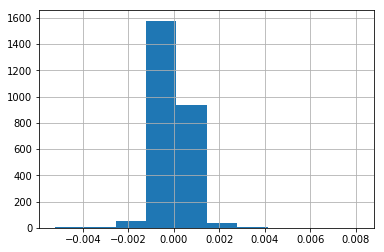

In [36]:
# Histograma de las diferencias 
series.hist()
pyplot.show()

### Curtosis 
 - Esta medida determina el grado de concentración que presentan los valores en la región central de la distribución.

In [37]:
kurt= series.kurtosis()
kurt

17.59802779671348

In [38]:
skew= series.skew()
skew

0.6944465457798217

In [39]:
series

1       0.000116
2      -0.000178
3      -0.000499
4       0.000570
5      -0.000143
          ...   
2616   -0.000009
2617   -0.000090
2618    0.000315
2619    0.000099
2620    0.000009
Name: diferencias, Length: 2620, dtype: float64

In [40]:
result = seasonal_decompose(series, model='additive')
result.plot()
pyplot.show()

AttributeError: 'Int64Index' object has no attribute 'inferred_freq'

In [70]:
np.arange(len(X))

array([   0,    1,    2, ..., 2618, 2619, 2620])

In [73]:
X = np.arange(len(df_pe.index))
y = df_pe["diferencias"]

In [74]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            diferencias   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01608
Date:                Sat, 08 Feb 2020   Prob (F-statistic):              0.899
Time:                        11:18:04   Log-Likelihood:                 15538.
No. Observations:                2620   AIC:                        -3.107e+04
Df Residuals:                    2619   BIC:                        -3.107e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.054e-09   8.31e-09      0.127      0.899   -1.52e-08    1.73e-08
==============================================================================
Omnibus:                      793.400   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33885.920
Skew:                           0.695   Prob(JB):                         0.00
Kurtosis:                      20.563   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Prueba fuller

Returns
- adffloat:
The test statistic.
- pvaluefloat:
MacKinnon’s approximate p-value based on MacKinnon (1994, 2010).
- usedlagint:
The number of lags used.
- nobsint:
The number of observations used for the ADF regression and calculation of the critical values.
- critical valuesdict_
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010).
- icbestfloat:
The maximized information criterion if autolag is not None.
- resstoreResultStore, optional:
A dummy class with results attached as attributes.

In [56]:
adfuller(df_pe['diferencias'])

(-52.33662752663742,
 0.0,
 0,
 2618,
 {'1%': -3.432850276300277,
  '5%': -2.8626446306749416,
  '10%': -2.5673580339787834},
 -30700.510706822533)

In [ ]:
#rechazamos HO: no es estacionaria 
#Por lo tanto si es estacionaria 

### Stationarity

In [60]:
df= df_pe[['diferencias']]

df['roll_mean'] = df_pe['diferencias'].rolling(50).mean()
df['roll_std'] = df_pe['diferencias'].rolling(50).std()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [64]:
df

,diferencias,roll_mean,roll_std
2,-0.000178,NaN,NaN
3,-0.000499,NaN,NaN
4,0.000570,NaN,NaN
5,-0.000143,NaN,NaN
6,0.000214,NaN,NaN
...,...,...,...
2616,-0.000009,0.000039,0.000578
2617,-0.000090,0.000038,0.000578
2618,0.000315,0.000044,0.000579
2619,0.000099,0.000047,0.000579


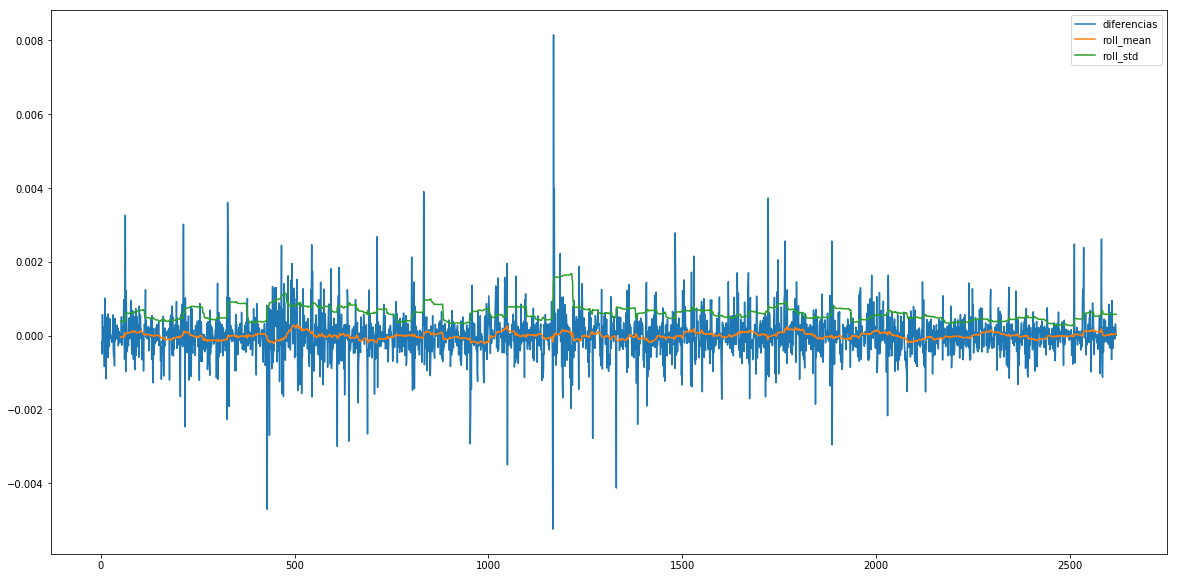

In [65]:
df.plot(figsize=(20,10))